We should call `.py` so that cuda memory will be automatically released after each part.

This notebook is used to organize the codes

## Setup

### What you need to do

- Throw audio files into `data/` directory

- Correctly set `input_list`

- Create a `.env` file in the `process/` directory if using `glm-4`

In [3]:
import os

In [4]:
DATA_PATH = os.getcwd() + '/data/'
MODEL_PATH = '/ssdshare/LLMs/'
MUSIC_PATH = os.getcwd() + '/data/music/'
LLM_MODEL = "glm-4"
GENRATE_MODEL = "playground-v2.5-1024px-aesthetic"
CONTENT_PATH = DATA_PATH + '.tmp/generate/'
STYLE_PATH = DATA_PATH + 'style/illustration_style/'

if not os.path.exists(DATA_PATH + '.tmp/'):
  os.makedirs(DATA_PATH + '.tmp/')

list = ['extract/', 'generate/', 'process/', 'inprompt', 'style_transfer']

for folder in list:
  if not os.path.exists(DATA_PATH + '.tmp/' + folder):
    os.makedirs(DATA_PATH + '.tmp/' + folder)


In [5]:
input_list = [
  'Distorted Fate.mp3',
]
prompts = [r'''

''',
]
# Pick the style images in the style library
style_list = [
  # 'opia.png'
]
num_char = 2 # default 1
num_non_char = 2 # default 1
image_num = 1 
# You should check both input_list and prompts modified!!!
with open(DATA_PATH + 'input_list.txt', 'w') as f:
  for item in input_list:
    f.write("%s\n" % item)

with open(DATA_PATH + 'style_list.txt', 'w') as f:
  for item in style_list:
    f.write("%s\n" % item)

tmp_list = []
for item in input_list:
  tmp_list.append(item[:-4])
input_list = tmp_list

# if not os.path.exists(DATA_PATH + '.tmp/inprompt/'):
#   os.makedirs(DATA_PATH + '.tmp/inprompt/')
for (prompt, name) in zip(prompts, input_list):
  with open(DATA_PATH + '.tmp/inprompt/' + name + '.prompt', 'w') as f:
    f.write(prompt)

## Extract

In [6]:
os.system(f'python extract/extract.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --music_path {MUSIC_PATH} --output_path {DATA_PATH}.tmp/extract/ --device_num 2 --ignore_lyrics False')

Distorted Fate.mp3
['Distorted Fate.wav']
audio_start_id: 155163, audio_end_id: 155164, audio_pad_id: 151851.


The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Try importing flash-attention for faster inference...
Loading checkpoint shards: 100%|██████████| 9/9 [00:18<00:00,  2.10s/it]
The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Try importing flash-attention for faster inference...
Loading checkpoint shards: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


using device 0
using device 1
using device 0
using device 1
using device 0
using device 1
using device 0
successfully add prompt for Distorted Fate.wav
This music is cut into 7 pieces. Each piece has a length of 30 seconds and an overlap of 5 seconds. The description of each piece is as follows:
Description piece 1: A powerful, energetic, intense, aggressive, powerful dubstep track with strong beats, powerful bass, extreme synthesizers, aggressive sound effects, and other powerful elements.
Description piece 2: The fast-paced electro song features distorted synthesizers, punchy drums, and loud sirens. It sounds energetic, intense, and powerful.
Description piece 3: The electronic track features a strong beat, punchy kick, claps, shimmering hi hats, powerful bass, glitchy effects, shimmering arpeggios, repetitive melodies, and vocal samples. It sounds energetic, intense, powerful, and futuristic.
Description piece 4: This is a track with a powerful and intense atmosphere. The distorted 

0

## Process

In [7]:
os.system(f'python process/process.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --model {LLM_MODEL} --prompt_path {DATA_PATH}.tmp/extract/ --output_path {DATA_PATH}.tmp/process/ --num_char {num_char} --num_non_char {num_non_char}')

['Distorted Fate']
Loading model
Model loaded
<class 'zhipuai._client.ZhipuAI'> <class 'NoneType'>
7
4
16
12
Token spent: 29687


0

In [8]:
for file_name in input_list:
  for t in range(num_char):
    with open(DATA_PATH + '.tmp/process/' + file_name + '.prompt' + str(t), 'r') as f:
      print(f.read())
  for t in range(num_non_char):
    with open(DATA_PATH + '.tmp/process/' + file_name + '.prompt_nc' + str(t), 'rb') as f:
      print(f.read())

intense action scene, urban landscape, dynamic lighting, edgy textures, abstract patterns, glowing lines, deep bass visualizations, bold colors, red and black dominate, accents of electric blue, figures in silhouette, facing off, sense of conflict, energy bursts, 8k resolution, 16:9 aspect ratio, 60fps, modernist aesthetic.
intense action scene, bold and dynamic figures, post-apocalyptic or futuristic warriors, sleek armor or high-tech suits, aggressive stances, vivid contrasts, dark background with neon highlights, glowing cyber elements, abstract patterns, intense light effects, deep bass vibrations, 8k resolution, 16:9 aspect ratio, 60fps, edgy atmosphere.
b'dynamic explosion of color, abstract patterns resembling energy waves, deep blacks and neon greens, glowing outlines of geometric shapes, intense light bursts, powerful contrasts,\xe8\x83\x8c\xe6\x99\xaf\xe8\x89\xb2\xe6\x9a\x96\xe8\x89\xb2\xe5\x92\x8c\xe5\x86\xb7\xe8\x89\xb2\xe7\x9a\x84\xe5\xbc\xba\xe7\x83\x88\xe5\xaf\xb9\xe6\xa

## Generate

In [9]:
os.system(f'python generate/generate.py --model_path {MODEL_PATH} --data_path {DATA_PATH} --model {GENRATE_MODEL} --output_path {DATA_PATH}.tmp/generate/ --prompt_path {DATA_PATH}.tmp/process/ --image_num {image_num} --num_char {num_char} --num_non_char {num_non_char}')

Loading prompt from file
Distorted Fate.prompt
Prompt loaded
Loading model


Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


Model loaded
Generating for Distorted Fate.prompt


100%|██████████| 50/50 [00:06<00:00,  7.83it/s]


Generated for Distorted Fate.prompt
Loading prompt from file
Generating image without characters
Prompt loaded
Generating for Distorted Fate.prompt_nc


Token indices sequence length is longer than the specified maximum sequence length for this model (174 > 77). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (174 > 77). Running this sequence through the model will result in indexing errors
100%|██████████| 50/50 [00:06<00:00,  7.82it/s]


Generated for Distorted Fate.prompt_nc


0

# Style transfer

If you don't want to keep the previous images, run the line below to remove them (so that we can show the images generated).

In [13]:
import os, glob
for file_name in input_list:
    [os.remove(f) for f in glob.glob(DATA_PATH + '.tmp/style_transfer/' + file_name + '/*')]

In [10]:
os.system(f'python style_transfer/style_transfer.py --data_path {DATA_PATH} --output_path {DATA_PATH}.tmp/style_transfer/ --style_path {STYLE_PATH} --content_path {CONTENT_PATH} -l_o --num_char {num_char} --num_non_char {num_non_char}')

['0-0.png', '1-0.png', 'nc0-0.png', 'nc1-0.png']
content: Distorted Fate/0-0.png
style: 7.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/0-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png
Building the style transfer model..


Style Loss : 0.910705 Content Loss: 1.782939:  80%|████████  | 40/50 [00:04<00:01,  9.28it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/0-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png done
content: Distorted Fate/1-0.png
style: 7.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/1-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png
Building the style transfer model..


Style Loss : 0.435340 Content Loss: 1.054155:  80%|████████  | 40/50 [00:04<00:01,  9.39it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/1-0.png to /root/LLM_project/codes/data/style/illustration_style/7.png done
content: Distorted Fate/nc0-0.png
style: 4.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/nc0-0.png to /root/LLM_project/codes/data/style/illustration_style/4.png
Building the style transfer model..


Style Loss : 0.919062 Content Loss: 3.429134:  80%|████████  | 40/50 [00:04<00:01,  9.40it/s] 


Transfer from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/nc0-0.png to /root/LLM_project/codes/data/style/illustration_style/4.png done
content: Distorted Fate/nc1-0.png
style: 4.png
Transferring from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/nc1-0.png to /root/LLM_project/codes/data/style/illustration_style/4.png
Building the style transfer model..


Style Loss : 0.256343 Content Loss: 0.870777:  80%|████████  | 40/50 [00:04<00:01,  9.39it/s]


Transfer from /root/LLM_project/codes/data/.tmp/generate/Distorted Fate/nc1-0.png to /root/LLM_project/codes/data/style/illustration_style/4.png done


0

# Final Results

Distorted Fate


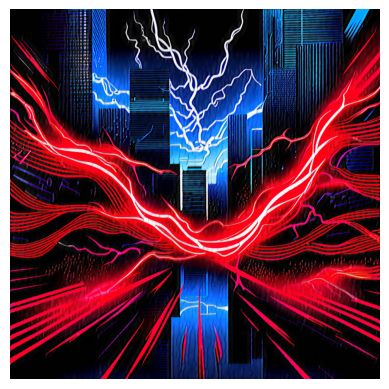

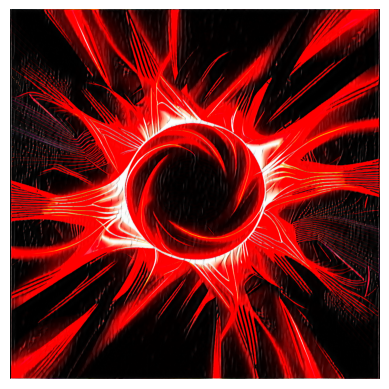

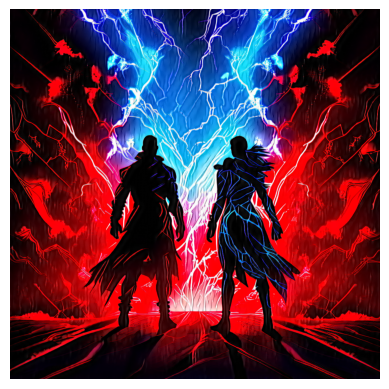

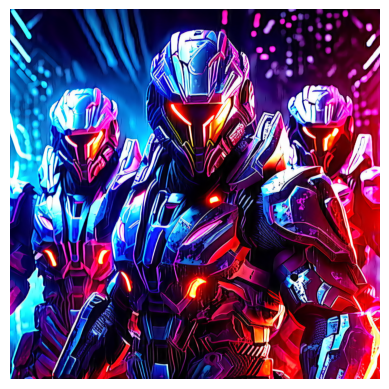

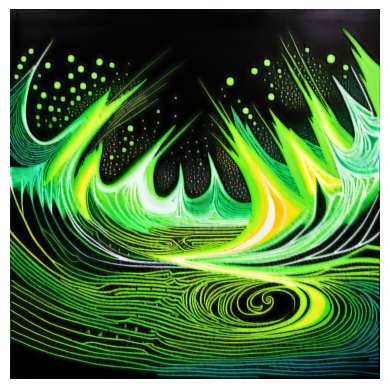

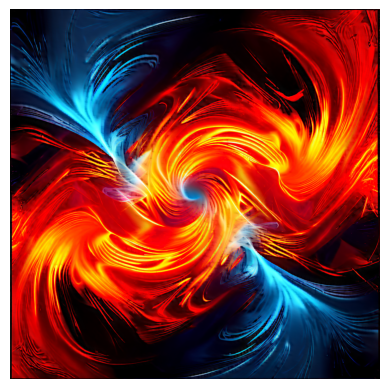

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

result = {}
for music in input_list:
  result[music] = os.listdir(DATA_PATH + '.tmp/style_transfer/'+music)

for (music, pics) in zip(result.keys(), result.values()):
  print(music)
  for pic in pics:
    if pic.endswith('.png'):
      image = Image.open((DATA_PATH + '.tmp/style_transfer/'+music+'/'+pic))
      plt.imshow(image)
      plt.axis('off')
      plt.show()